### Emma Klemets, 260775167   
All my work, code, output and written answers for #2 are in this notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 2: 
Let’s use conjugate gradient to solve Laplace’s equation with boundary conditions using Green’s functions. With a little cleverness, we can actually do this without needing to set an exterior boundary. For
speed, let’s do this in two dimensions.

#### part a: 
First, we’ll figure out what V (r) (scalar potential) looks like from a point charge. Remember that a 2D point charge looks like a 3D line charge and so will have a log behavior rather than 1/r. We also need to be careful about the singularity at 0. While this can actually be written down properly with some effort, a much easier trick is to note that away from the origin, each point is the average of its neighbors. By knowing the potential at (1,0) has to be the average of its neighbors, we can work out the potential at the origin. We’ll ignore eps_0 and set ρ (charge density) to be the potential minus the average of neighbors. 

If you rescale your potential so that ρ[0, 0] = 1 and V [0, 0] = 1
(recall that we can add an arbitrary offset to a potential without affecting the physics of the situation), what is the potential V [1, 0] and V [2, 0]? 

To sanity check your answer, the potential V [5, 0] should be around -1.05.

$\nabla^2 V = -\rho$

$V(r) = -\frac{\lambda}{2\pi\epsilon_0}ln(r)$

C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


inf
0.2206356001526516


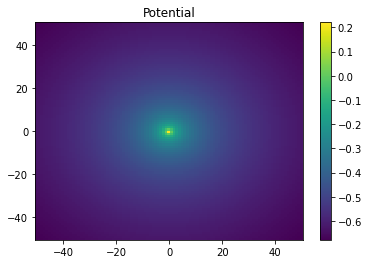

In [56]:
# V (r) looks like from a point charge will have a log behavior rather than 1/r. 

n = 101 #9
# ep_0 = 1 #should I not being using this?

V = np.zeros([n,n])
rad = lambda x, y: np.sqrt(x**2 + y**2)

#our 2D potential from a point charge
# twoD_po = lambda r: -np.log(r) #should we have all the constants here?
twoD_po = lambda r: -1/(2*np.pi) * np.log(r) #should we have all the constants here?

#get indice of [0, 0] since it's in the center of my array
centI = int(n/2)
# print(centI)

x=np.linspace(-centI,centI,n)
xx,yy=np.meshgrid(x,x)

#get the potential everywhere
V_r = twoD_po(rad(xx,yy))

# print("r:", r(xx[centI+1, centI],yy[centI+1, centI]))

# print(xx)
#but origin give inf as expected, so deal gotta with that
print(V_r[centI, centI])

# print((V_r[centI+1, centI], V_r[centI, centI+1], V_r[centI-1, centI], V_r[centI, centI-1]))
# for origin
# singularity at 0, trick is to note that away from the origin, each point is the average of its neighbors. 
# By knowing the potential at (1,0) has to be the average of its neighbors, we can work out the potential at the origin. 
V_r[centI, centI] = 4*V_r[centI+1, centI] - (V_r[centI+2, centI] + V_r[centI+1, centI+1] + V_r[centI+1, centI-1])

print(V_r[centI, centI])

#it's easy to pass the right x and y indices with this
plt.pcolor(xx, yy, V_r,  shading='auto')
plt.title("Potential")
plt.colorbar()
plt.show()

In [57]:
# set ρ to be the potential minus the average of neighbors. 
# rho = V - 0.25*(V_r[centI+1, centI] + V_r[i, i+1] + V_r[i-1, i] + V_r[i, i-1])

ave=(np.roll(V_r,1,axis=0)+np.roll(V_r,-1,axis=0)+np.roll(V_r,1,axis=1)+np.roll(V_r,-1,axis=1))/4
# print(ave[centI, centI])
rho = V_r - ave

print(rho[centI, centI])

rescale_rho = rho[centI, centI]


0.2206356001526516


In [58]:
#rescale by a multiple so rho[0,0] = 1
V_r = V_r/rescale_rho

# print("Needed offset for V: {} to get V[0,0] = {}".format(offset, V_r[centI, centI]))
# print("V[5, 0] = {}".format(V_r[centI+5, centI])) #should be around -1.05

ave=(np.roll(V_r,1,axis=0)+np.roll(V_r,-1,axis=0)+np.roll(V_r,1,axis=1)+np.roll(V_r,-1,axis=1))/4
# print(ave[centI, centI])
rho = V_r - ave

print("Needed to multiply by {} to get density rho[0, 0] = {}".format(rescale_rho, rho[centI, centI]))


Needed to multiply by 0.2206356001526516 to get density rho[0, 0] = 1.0


In [59]:
print(V_r[centI, centI])#, (V_r[centI+5, centI]))#
offset = 1 - V_r[centI, centI] 
V_r = V_r + offset #do I just add it?
#can multiply

print("Needed offset for V: {} to get V[0,0] = {}".format(offset, V_r[centI, centI]))
print("V[5, 0] = {}".format(V_r[centI+5, centI])) #should be around -1.05 hmm closer but still not quite?

1.0
Needed offset for V: 0.0 to get V[0,0] = 1.0
V[5, 0] = -1.160964047443681


Density rho[0, 0] = 1.0
potential V[1, 0] = 0.0 and V[2, 0] = -0.5


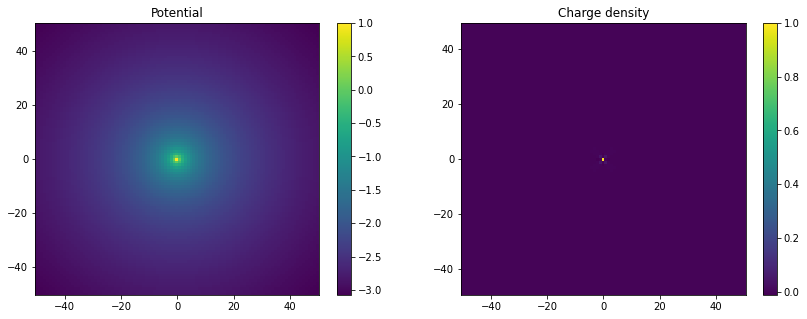

In [60]:
#checking the resulting values

print("Density rho[0, 0] = {}".format(rho[centI, centI]))

print("potential V[1, 0] = {} and V[2, 0] = {}".format(V_r[centI+1, centI], V_r[centI+2, centI]))
# how do I scale rho? won't this change V again?

fig, ax = plt.subplots(1, 2, figsize=(14,5))
im1 = ax[0].pcolor(xx, yy, V_r,  shading='auto')
ax[0].set_title("Potential")
fig.colorbar(im1, ax=ax[0])

b = 1
im2 = ax[1].pcolor(xx[b:-b], yy[b:-b], rho[b:-b],  shading='auto')
ax[1].set_title("Charge density")
fig.colorbar(im2, ax=ax[1])

plt.show()

# print(V_r[1,0], V_r[2,0], V_r[5,0])

V[1, 0] = offset, as $V(1 = -\frac{\lambda}{2\pi\epsilon_0}ln(1)) = 0$ and then it's rescaled.

## part b: 
Now that we know what the potential from a point charge is, we can calculate the potential everywhere in space from an arbitrary charge distribution by convolving the charge by our hard-won but eternal Green’s
function. We can write this as V = G x ρ. where G is the Green’s function. Even though we don’t usually think of it that way, this is indeed a matrix equation and so can be solved using conjugate-gradient (or any other tool
you care to use). In this case, though, we start with the potential on some surfaces, and want to find the charge distribution on those same surfaces. Write a conjugate-gradient solver that solves for ρ on a mask given V on
that mask. Use your solver to find the charge on a square box held at a potential of 1. Plot the charge density along one side of the box.

for 2D Laplace: Green's $= \frac{1}{2\pi}ln(r)$

But what happens for r = 0 when this is undefined?


In [61]:
# V = G x ρ (convolution)
"""
Is the convolution or G wrong, 
or just everything?

"""

#convolve two arrays and add a variable amount of padding (p) before doing so
def convFunction(arr1, arr2, p=5):
    
    arrFT1 = np.fft.fft(np.pad(arr1, (p,)))
    arrFT2 = np.fft.fft(np.pad(arr2, (p,)))

    #     arrFT1 = np.fft.fft(np.pad(arr1, [0, p]))
    #     arrFT2 = np.fft.fft(np.pad(arr2, [0, p]))
        
    convolved = np.fft.ifft(arrFT1 * arrFT2)
    
    if p > 0:
        convolved = convolved[p:-p,p:-p]
#         convolved = convolved[:-p,:-p]

    return convolved.real

# green = lambda r: -1/(2*np.pi) * np.log(r)

def green(x, y, soften = 0.01):
    r = rad(x,y)
    #
    r[r<soften] = soften

    g = -1/(2*np.pi) * np.log(r) #1/(4* np.pi * r)
    
    return g

In [66]:
def Ax(G, rho, mask): 
    Gp = convFunction(G, rho, p=1)
    
    GpUse=Gp.copy()
#     GpUse[mask]=1.0 #want our potential to be 1 in box ? but that's what b is, 

    GpUse[np.logical_not(mask)]=0.0 #want our potential outside to be 0?
    
#     plt.pcolor(xx, yy, GpUse,  shading='auto')
#     plt.colorbar()
#     plt.show()

#     print(GpUse[mask])
    return GpUse

In [48]:
# result = np.zeros(V.shape)
# result[:V_r.shape[0],:V_r.shape[1]] = V_r
# print(result)

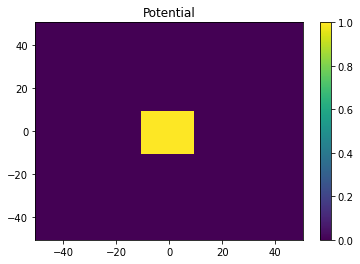

In [75]:
m=101
# m = n//2

cM = int(m/2)
s = 10

#setting up the BC of the potential I want
V_bc=np.zeros([m,m])

x=np.linspace(-cM,cM,m)
xx,yy=np.meshgrid(x,x)

#solid box?
# V=V_r
V_bc[cM-s:cM+s,cM-s:cM+s] = 1.0
    
plt.pcolor(xx, yy, V_bc,  shading='auto')
plt.title("Potential")
plt.colorbar()
plt.show()

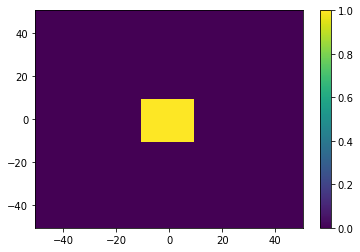

on iteration 0 residual is 400.0
on iteration 100 residual is 353.5899363973515
on iteration 200 residual is 835.5409022821366
on iteration 300 residual is 5673.004329017553
on iteration 400 residual is 1046.7204883837244
on iteration 500 residual is 1403.5111171273743
on iteration 600 residual is 22440.283382179132
on iteration 700 residual is 6851.106488000357
on iteration 800 residual is 539025.3898860964
on iteration 900 residual is 12432.14439963856


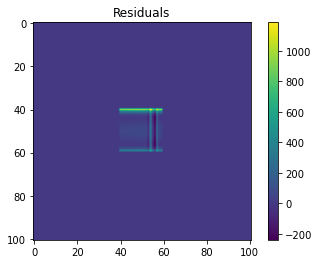

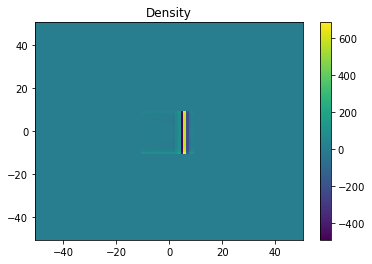

In [82]:
bc=np.zeros([m,m])

mask=np.zeros([m,m],dtype='bool')

#mask our line - I'm not actually usign this at all
mask[cM-s:cM+s,cM-s:cM+s]=True
bc[cM-s:cM+s,cM-s:cM+s]=1.0 #I don't think I need these anyways - cause that's what my V is

# bc[0,:] = 0.0
# bc[-1,:] = 0.0
# bc[:,0] = 0.0
# bc[:,-1] = 0.0

# mask[0,:] = True
# mask[-1,:] = True
# mask[:,0] = True
# mask[:,-1] = True

# V = bc[mask]
# rho = 0 * V

b=V_bc.copy()

# print(b)

#what is b really?
# is it just the 1/2pi * ln(r) function?
centI = int(m/2)
# print(centI)

x=np.linspace(-centI,centI,m)
xx,yy=np.meshgrid(x,x)

G = green(xx,yy)
# print(G[50,:])
#I get nans for the center point, cause there r = 0 and log(0) = -inf
#doing this for now but this must be wrong -> soften to get rid of infs

#and what about the mask??
# FT of point charge potential

# kernel = V_r.copy()
# G = np.fft.rfft2(G)

# G = kernelft     
#initial guess for rho
rho = np.zeros([m,m])

r=b-Ax(G, rho, mask)

# print(np.nonzero(Ax(G, rho, mask)))

plt.pcolor(xx, yy, mask, shading='auto')
plt.colorbar()
plt.show()

p=r.copy()

for k in range(1000):

    Ap=Ax(G, p, mask)

    rtr=np.sum(r*r)
    if k%100==0:
        print('on iteration ' + repr(k) + ' residual is ' + repr(rtr))
        #are really not getting smaller
    alpha=rtr/np.sum(Ap*p)

    rho=rho+alpha*p #pad(alpha*p)

    rnew=r-alpha*Ap
    beta=np.sum(rnew*rnew)/rtr
    p=rnew+beta*p
    r=rnew

plt.imshow(r)
plt.title("Residuals")
plt.colorbar()
plt.show()

plt.pcolor(xx, yy, rho, shading='auto')
plt.title("Density")
plt.colorbar()
plt.show()

In [84]:
#getting some really weird streaks that must be wrong


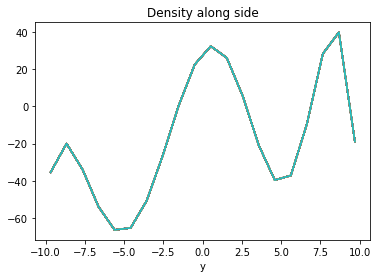

In [55]:
# Plot the charge density along one side of the box.
# cM-s:cM+s,cM-s

# plt.pcolor(xx, yy, rho, shading='auto')
plt.plot(yy[cM-s:cM+s], rho[cM-s:cM+s,cM-s])#, shading='auto')

plt.title("Density along side")
plt.xlabel("y")
# plt.colorbar()
plt.show()

#### part c: 
Now that you have the charge, show the potential everywhere in space. How close to constant is the potential in the interior of the box? Now plot the x− and y−components of the field just outside the box. Do they agree with what you expect? As a reminder, the boundary conditions are that the field is perpendicular to any equipotential, and that standard lore says that fields are stronger near points.

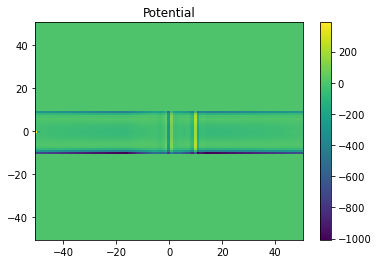

In [85]:
#3??
V_solved = convFunction(G, rho)

plt.pcolor(xx, yy, V_solved,  shading='auto')
plt.title("Potential")
plt.colorbar()
plt.show()

Rho here:  5.992912023479466
Before scaling, V=-0.05515890003816291, rho=0.008878599802684121
Needed to multiply by 0.0014815167931547966 to get density rho[x, y] = 5.992912023479466
-37.23137010192474
Needed to offset 38.23137010192474 to get V[x, y] = 1.0
V here:  1.0


C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


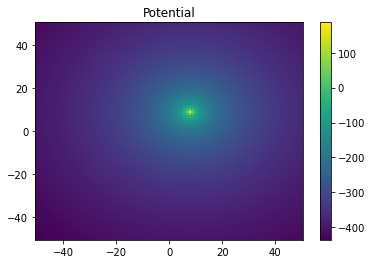

In [345]:
#Or am I suppose to use part a)?
x = 8
y = 9

print("Rho here: ", rho[cM+x, cM+y])

Vpoint = getV(rho[cM+x, cM+y], x, y, m)
# Vpoint = getV(1.0, x, y, m)

print("V here: ", Vpoint[cM+x, cM+y])#, Vpoint[50, 50])
#i think the numbers are so big that when I try to offset it to 1 I get 0 instead?

plt.pcolor(xx, yy, Vpoint,  shading='auto')
plt.title("Potential")
plt.colorbar()
plt.show()

-10 10 50


C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


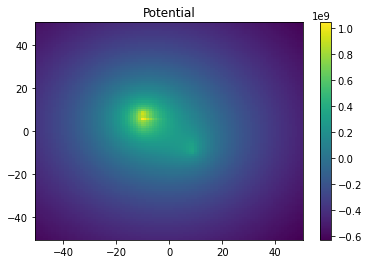

In [347]:
V_total = np.zeros([m,m])
print(-s,s, cM)

for x in range(-s,s):
    for y in range(-s,s): #(cM-s,cM+s)
#         print(x,y)
        Vpoint = getV(rho[x+cM, y+cM], x, y, m, text=False)
        V_total += Vpoint
#         print("V here: ", Vpoint[x, y], x, y)

#         if Vpoint[x+cM, y+cM] != 0.0:
#             print(x, y, Vpoint[x+cM, y+cM], rho[x+cM, y+cM])
        
# print(V_total[39:45, 39:45])
plt.pcolor(xx, yy, V_total, shading='auto')
plt.title("Potential")
plt.colorbar()
plt.show()

In [83]:
def radius(x, y, x_p, y_p):
    return np.sqrt((x-x_p)**2 + (y-y_p)**2)
    

In [209]:
def getV(rho_point, x, y, n, text=True):

    V = np.zeros([n,n])

    #get indice of [0, 0] since it's in the center of my array
    centI = int(n/2)

    #get the potential everywhere
    V = twoD_po(radius(xx,yy, x, y))
            
    #using the averaging technique for the r-r' = 0 spots
    for x_i in range(centI-s,centI+s):
        for y_i in range(centI-s,centI+s): #(cM-s,cM+s)
            if np.isinf(V[x_i, y_i]):
#                 print("inf!!", V[x_i, y_i])
                V[x_i, y_i] = 4*V[x_i+1, y_i] - (V[x_i+2, y_i] + V[x_i+1, y_i+1] + V[x_i+1, y_i-1])

    # set ρ to be the potential minus the average of neighbors.
    ave=(np.roll(V,1,axis=0)+np.roll(V,-1,axis=0)+np.roll(V,1,axis=1)+np.roll(V,-1,axis=1))/4
    rho_here = V - ave

    if text:
        print("Before scaling, V={}, rho={}".format(V[centI+x, centI+y], rho_here[centI+x, centI+y]))

    rescale_rho = rho_here[centI+x, centI+y] / rho_point #needs to be rho_point

    #rescale by a multiple so rho[0,0] = 1
    V = V/rescale_rho

    ave=(np.roll(V,1,axis=0)+np.roll(V,-1,axis=0)+np.roll(V,1,axis=1)+np.roll(V,-1,axis=1))/4
    # print(ave[centI, centI])
    rho_here = V - ave
    if text:
        print("Needed to multiply by {} to get density rho[x, y] = {}".format(rescale_rho, rho[centI+x, centI+y]))

        print(V[centI+x, centI+y])#, (V_r[centI+5, centI]))#
    offset = 1 - V[centI+x, centI+y]
    V = V + offset
    
    if text:
        print("Needed to offset {} to get V[x, y] = {}".format(offset, V[centI+x, centI+y]))

#         print(V[centI+x, centI+y])
    
    return V


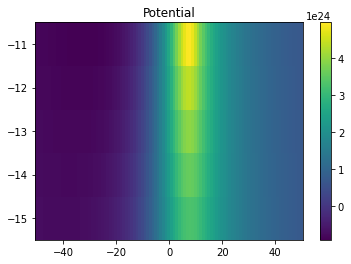

In [307]:
# Now plot the x− and y−components of the field just outside the box. 
# Do they agree with what you expect? As a reminder, the boundary conditions are that 
# the field is perpendicular to any equipotential, 
# and that standard lore says that fields are stronger near points.

# plt.plot(yy[cM-s:cM+s], rho[cM-s:cM+s,cM-s])#, shading='auto')

# fig, ax = plt.subplots(1, 2, figsize=(14,5))
# ax[0].plot(xx[cM-s:cM+s], V_total[cM-s:cM+s,cM-s])
# ax[0].set_title("Potential")
# # fig.colorbar(im1, ax=ax[0])

# ax[1].plot(yy[cM-s:cM+s], V_total[cM-s, cM-s:cM+s])
# ax[1].set_title("Potential")
# fig.colorbar(im2, ax=ax[1])

# plt.show()

plt.pcolor(xx[cM-s-5:cM-s], yy[cM-s-5:cM-s], V_total[cM-s-5:cM-s], shading='auto')
plt.title("Potential")
plt.colorbar()
plt.show()